# Principal Component Analysis & Mahalanobis Distance

## PCA

In [5]:
import pandas as pd
import dataframe_image as dfi
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# https://www.kaggle.com/datasets/saurabh00007/iriscsv
filename = 'Iris.csv'
df = pd.read_csv(filename, index_col=0)
cols_x = list(df.columns[0:4])
col_y = df.columns[4]

# model pipeline for PCA
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('PCA', PCA()),
])
features = df[cols_x]
pipe.fit(features)

# PCA scores
scores = pipe.transform(features)
df_pca = pd.DataFrame(
    scores,
    columns=["PC{}".format(x + 1) for x in range(scores.shape[1])],
    index=df.index
)
cols_pc = list(df_pca.columns)
df_pca.insert(0, col_y, df[col_y].copy())
dfi.export(df_pca.head(), 'table_31_iris_PCA.png')
df_pca.head()

[0104/092257.878981:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0104/092258.215431:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0104/092258.390088:INFO:headless_shell.cc(623)] Written to file /tmp/tmpkvxlk466/temp.png.


,Species,PC1,PC2,PC3,PC4
Id,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


# Mahalanobis Distance

In [6]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

X = df_pca[cols_pc]
emp_cov = EmpiricalCovariance().fit(X)
robust_cov = MinCovDet().fit(X)

In [7]:
df_pca['MLE'] = emp_cov.mahalanobis(X)
df_pca['MCD'] = robust_cov.mahalanobis(X)
dfi.export(df_pca.head(), 'table_32_iris_PCA_MD.png')
df_pca.head()

[0104/092301.620418:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0104/092301.702886:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0104/092301.906044:INFO:headless_shell.cc(623)] Written to file /tmp/tmpsjb70io2/temp.png.


,Species,PC1,PC2,PC3,PC4,MLE,MCD
Id,,,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073,2.166110,1.931572
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208,2.829165,3.139274
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825,2.091985,2.166678
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311,2.463058,2.488321
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397,2.525591,2.390836


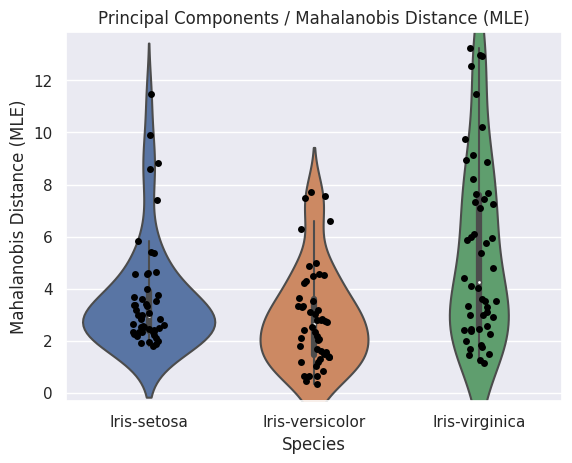

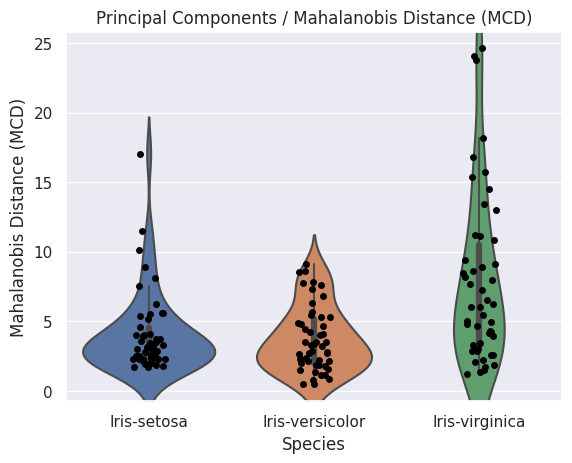

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
sns.set()

for md in ['MLE', 'MCD']:
    fig, ax = plt.subplots()
    sns.violinplot(data=df_pca, x='Species', y=md, showfliers=False, ax=ax)
    sns.stripplot(data=df_pca, x='Species', y=md, jitter=True, color='black', ax=ax)

    ax.set_ylabel('Mahalanobis Distance (%s)' % md)
    ax.set_title('Principal Components / Mahalanobis Distance (%s)' % md)
    plt.savefig('iris_31_PCA_MD_%s.png' % md)
    plt.show()